In [2]:
import sys
import random
sys.path.append("../")
from Core.maze import Maze

# Kruskal's Algorithm
Kruskals algorithm is a very well known algorithm used to find minimum spanning trees in a graph. Here we will use kruskals algorithm randomly on our grid to try and make a perfect maze. We are guaranteed that every node will be connected to every other node, as the resultant will be a minimum spannning tree, which also serves as a maze.
## How does it work?
Kruskal's algorithm works by assigning every node a distinct ID and then joining them using pathways. We randomly select an uncarved pathway and check if it connects two unconnected nodes. If it does, we carve the pathway and add it to our maze.

### Prerequisites
Kruskals algorithm requires a disjoint set data structure, in order to give the nodes their distinct IDs.

In [3]:
# A disjoint set of singular data
class dset:
    def __init__(self, data):
        self.data = data
        self.parent = self

    def find(self):
        if self.parent == self:
            return self

        return self.parent.find()

    def union(self, set2):
        p1 = self.find()
        p2 = set2.find()
        p1.parent = p2

In [14]:
def Kruskals(maze):
    # maintain a lookup grid with disjoint set objects
    nodes = [[dset((x, y)) for x in range(maze.num_columns)] for y in range(maze.num_rows)]
    
    # populate list with available edges
    available = []
    for i in range(maze.num_rows):
        for j in range(maze.num_columns):
            if i > 0:
                available.append((i, j, "W"))
            if j > 0:
                available.append((i, j, "N"))
    
    #print(len(available))
    while available:
        # randomly pick an edge to carve a path into
        x, y, direction = random.choice(available)
        
        if direction == "N" and nodes[x][y].find() != nodes[x][y - 1].find():
            maze.add_path((x, y), direction, 0)
            nodes[x][y].union(nodes[x][y - 1])
        
        if direction == "W" and nodes[x][y].find() != nodes[x - 1][y].find():
            maze.add_path((x, y), direction, 0)
            nodes[x][y].union(nodes[x - 1][y])
        
        available.remove((x, y, direction))

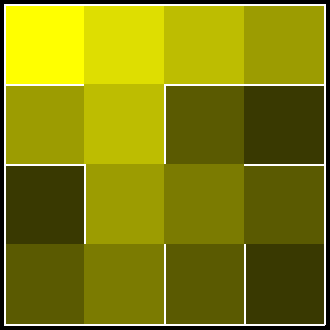

In [15]:
maze = Maze(4, 4)
Kruskals(maze)
maze.add_colors(color=(255, 255, 0))
display(maze.draw(cell_width=80))

112


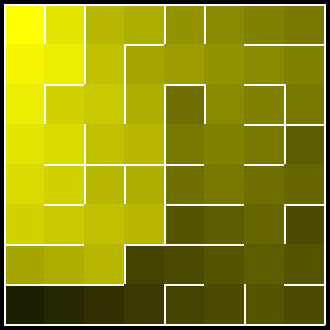

In [12]:
maze = Maze(8, 8)
Kruskals(maze)
maze.add_colors(color=(255, 255, 0))
display(maze.draw(cell_width=40))

480


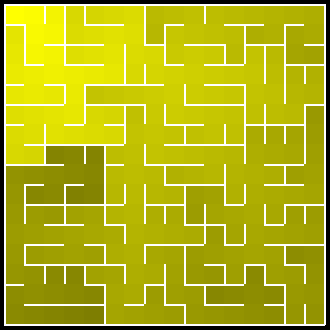

In [11]:
maze = Maze(16, 16)
Kruskals(maze)
maze.add_colors(color=(255, 255, 0))
display(maze.draw(cell_width=20))

## Basic Analysis
### Time Complexity: O(N log N)
The algorithm determines all available edges by iterating through the dimensions of the grid, and effectively performs find and union operations for each available edge. Thus the time complexity turns out to be O(N log N), where N is the number of cells/nodes in the grid.

### Space Complexity: O(N)
We're required to keep track of available edges in the grid using a disjoint set data structure to avoid cycles in the spanning tree constructed by our algorithm Hence, the space complexity would be O(N), where N is the number of cells/nodes in the grid.

### Bias/Texture:
Mazes generated using Kruskal's Algorithm don't appear to have any bias. This is because there are no walk-like traversals; rather, nodes are visited non-sequentially to carve the path.

In [16]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    Kruskals(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  30.590000
Straightways  :  16.034200
   LeftTurns  :  13.385300
  RightTurns  :  13.420600
   Junctions  :  22.569800
  Crossroads  :  4.000100


### Further analysis
As we can see mazes generated with kruskals algorithm tend to have a higher percentage of deadends. This is because the probability of choosing an edge coincident on a node already visited is pretty low, and hence there tend to be multiple deadends. We also observe that there are more junctions than straightways, which means that the mazes generated tend to have more random passageways, and not many long passages. This means that the average distance from any point is also low, which is logical because kruskals algorithm creates a minimum spanning tree. 